In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('parkinsons.zip','r') as zipObj:
  zipObj.extractall()

#Image preprocessing of spiral drawings

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile as zf
import os
import random
import cv2
import imutils
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from skimage import feature
from keras.utils import to_categorical
from imutils import build_montages,paths
from google.colab.patches import cv2_imshow
sns.set()

In [ ]:
os.getcwd()

'/content'

In [ ]:
spiral_train_healthy = os.listdir('/content/parkinsons/spiral/training/healthy/')
spiral_train_park = os.listdir('/content/parkinsons/spiral/training/parkinson/')

fp_spiral_train_healthy = '/content/parkinsons/spiral/training/healthy/'
fp_spiral_train_park = '/content/parkinsons/spiral/training/parkinson/'

spiral_test_healthy = os.listdir('/content/parkinsons/spiral/testing/healthy/')
spiral_test_park = os.listdir('/content/parkinsons/spiral/testing/parkinson/')

fp_spiral_test_healthy = '/content/parkinsons/spiral/testing/healthy/'
fp_spiral_test_park = '/content/parkinsons/spiral/testing/parkinson/'

In [ ]:
def quantify_image(image):
  features = feature.hog(image,orientations=9,
                pixels_per_cell=(10,10),cells_per_block=(2,2),transform_sqrt=True,block_norm="L1")

  return features

In [ ]:
trainX = []
testX = []
outputs = []
trainY = []
testY = []

for i in spiral_train_healthy:
  image = cv2.imread(fp_spiral_train_healthy+i)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image =cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  trainX.append(features)
  trainY.append('healthy')

for i in spiral_train_park:
  image = cv2.imread(fp_spiral_train_park+i)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  trainX.append(features)
  trainY.append('parkinson')

for i in spiral_test_healthy:
  image = cv2.imread(fp_spiral_test_healthy+i)
  outputs.append(image)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  testX.append(features)
  testY.append('healthy')

for i in spiral_test_park:
  image = cv2.imread(fp_spiral_test_park+i)
  outputs.append(image)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  testX.append(features)
  testY.append('parkinson')

In [ ]:
trainX = np.array(trainX)
testX = np.array(testX)
trainY = np.array(trainY)
testY = np.array(testY)

In [ ]:
trainX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
testX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
trainY

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson'], dtype='<U9')

In [ ]:
testY

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson'], dtype='<U9')

In [ ]:
le = LabelEncoder()
trainY = le.fit_transform(trainY)
testY = le.transform(testY)

In [ ]:
trainY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
testY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
model = RandomForestClassifier(n_estimators=100)

In [ ]:
model.fit(trainX,trainY)

RandomForestClassifier()

In [ ]:
preds = model.predict(testX)
preds

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
cnf = confusion_matrix(testY,preds)
cnf

array([[13,  2],
       [ 3, 12]])

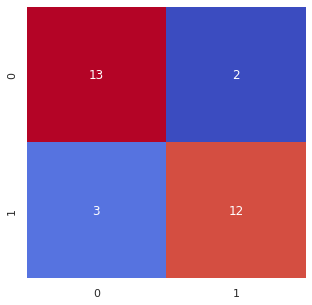

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf , annot=True , cmap="coolwarm" , cbar=False)
plt.show()

In [ ]:
acc = metrics.accuracy_score(testY,preds)
acc

0.8333333333333334

In [ ]:
indexes = np.random.randint(0,30,25)
indexes

array([12,  9, 16,  9, 16, 24,  0, 23,  4,  0, 26,  1, 28,  1, 19, 19, 18,
        7, 25, 18, 26,  2,  4,  0, 25])

In [ ]:
labels = []

for i in indexes:
  pred = le.inverse_transform(preds)[i]
  labels.append(pred)

In [ ]:
labels

['healthy',
 'healthy',
 'parkinson',
 'healthy',
 'parkinson',
 'parkinson',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'parkinson',
 'healthy',
 'healthy',
 'parkinson',
 'parkinson',
 'healthy',
 'healthy',
 'healthy',
 'healthy']

In [ ]:
results = []

for i in range(25):
  image = outputs[i]

  if labels[i] == 'healthy':
    color = (0,255,0)
  else:
    color = (0,0,255)

  text = str(labels[i])

  image = cv2.resize(image,(128,128))
  cv2.putText(image,text,(3,20),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)

  results.append(image)

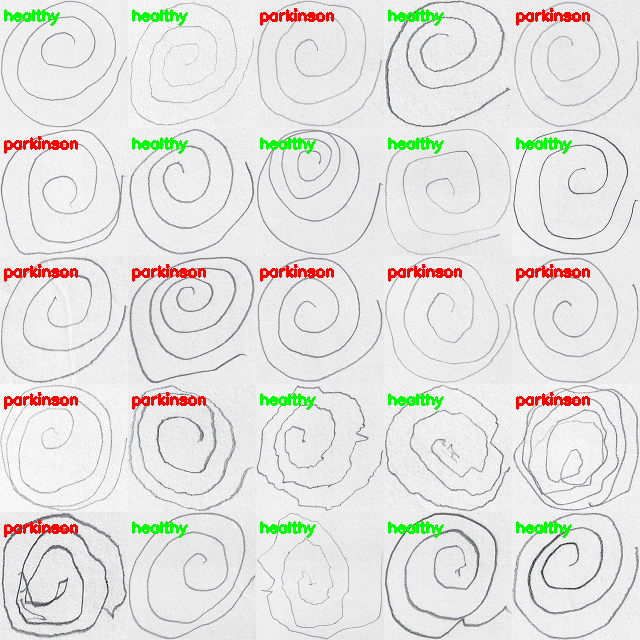

-1

In [ ]:
montage = build_montages(results,(128,128),(5,5))[0]

cv2_imshow(montage)
cv2.waitKey(0)

#Image preprocessing of wave drawings

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile as zf
import os
import random
import cv2
import imutils

from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier

from skimage import feature

from keras.utils import to_categorical
from imutils import build_montages,paths
from google.colab.patches import cv2_imshow

sns.set()

In [ ]:
os.getcwd()

'/content'

In [ ]:
wave_train_healthy = os.listdir('/content/parkinsons/wave/training/healthy/')
wave_train_park = os.listdir('/content/parkinsons/wave/training/parkinson/')

fp_wave_train_healthy = '/content/parkinsons/wave/training/healthy/'
fp_wave_train_park = '/content/parkinsons/wave/training/parkinson/'

wave_test_healthy = os.listdir('/content/parkinsons/wave/testing/healthy/')
wave_test_park = os.listdir('/content/parkinsons/wave/testing/parkinson/')

fp_wave_test_healthy = '/content/parkinsons/wave/testing/healthy/'
fp_wave_test_park = '/content/parkinsons/wave/testing/parkinson/'

In [ ]:
def quantify_image1(image1):
  features1 = feature.hog(image1,orientations=9,
                pixels_per_cell=(10,10),cells_per_block=(2,2),transform_sqrt=True,block_norm="L1")

  return features1

In [ ]:
trainX1 = []
testX1 = []
outputs1 = []
trainY1 = []
testY1 = []

for i in wave_train_healthy:
  image1 = cv2.imread(fp_wave_train_healthy+i)
  image1 = cv2.cvtColor(image1 , cv2.COLOR_BGR2GRAY)
  image1 = cv2.resize(image1 , (200,200))
  image1 =cv2.threshold(image1, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features1 = quantify_image1(image1)
  trainX1.append(features1)
  trainY1.append('healthy')

for i in wave_train_park:
  image1 = cv2.imread(fp_wave_train_park+i)
  image1 = cv2.cvtColor(image1 , cv2.COLOR_BGR2GRAY)
  image1 = cv2.resize(image1 , (200,200))
  image1 = cv2.threshold(image1 ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features1 = quantify_image1(image1)
  trainX1.append(features1)
  trainY1.append('parkinson')

for i in wave_test_healthy:
  image1 = cv2.imread(fp_wave_test_healthy+i)
  outputs1.append(image1)
  image1 = cv2.cvtColor(image1 , cv2.COLOR_BGR2GRAY)
  image1 = cv2.resize(image1 , (200,200))
  image1 = cv2.threshold(image1 ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features1 = quantify_image1(image1)
  testX1.append(features1)
  testY1.append('healthy')

for i in wave_test_park:
  image1 = cv2.imread(fp_wave_test_park+i)
  outputs1.append(image1)
  image1 = cv2.cvtColor(image1 , cv2.COLOR_BGR2GRAY)
  image1 = cv2.resize(image1 , (200,200))
  image1 = cv2.threshold(image1 ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features1 = quantify_image1(image1)
  testX1.append(features1)
  testY1.append('parkinson')

In [ ]:
trainX1 = np.array(trainX)
testX1 = np.array(testX)
trainY1 = np.array(trainY)
testY1 = np.array(testY)

In [ ]:
trainX1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
testX1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
trainY1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
testY1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
le = LabelEncoder()
trainY1 = le.fit_transform(trainY)
testY1 = le.transform(testY)

In [ ]:
trainY1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
testY1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
le = LabelEncoder()

In [ ]:
trainY1 = le.fit_transform(trainY1)
testY1 = le.transform(testY1)

In [ ]:
trainY1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
testY1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
model= KNeighborsClassifier()

In [ ]:
model.fit(trainX1,trainY1)

KNeighborsClassifier()

In [ ]:
preds = model.predict(testX1)
preds

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1])

In [ ]:
cnf = confusion_matrix(testY1,preds)
cnf

array([[11,  4],
       [ 2, 13]])

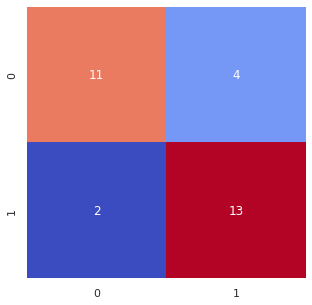

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf , annot=True , cmap="coolwarm" , cbar=False)
plt.show()

In [ ]:
acc = metrics.accuracy_score(testY1,preds)
acc

0.8

In [ ]:
indexes = np.random.randint(0,30,25)
indexes

array([19,  0, 10, 20, 13, 18, 12, 18, 29,  5,  4, 27, 23,  8, 29, 21,  8,
       16, 24, 25,  2, 12,  5,  3, 29])

In [ ]:
labels = []

for i in indexes:
  pred = le.inverse_transform(preds)[i]
  labels.append(pred)

In [ ]:
labels

[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1]

In [ ]:
results = []

for i in range(25):
  image = outputs1[i]

  if labels[i] == 'healthy':
    color = (0,255,0)
  else:
    color = (0,0,255)

  text = str(labels[i])

  image = cv2.resize(image,(128,128))
  cv2.putText(image,text,(3,20),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)

  results.append(image)

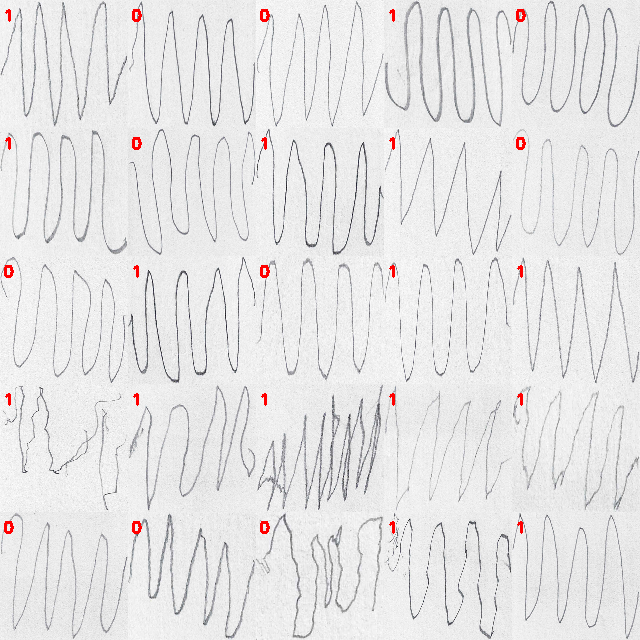

-1

In [ ]:
montage = build_montages(results,(128,128),(5,5))[0]
cv2_imshow(montage)
cv2.waitKey(0)